# 10.2.2 使用顺序API构建图像分类器

## 使用Keras加载数据集

In [1]:
import tensorflow as tf
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

C:\Users\Administrator\anaconda3\envs\DeepLearning-py310\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [2]:
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [3]:
# 因为要进行梯度下降 所以要将数据归一化到0-1之间
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [4]:
# 创建一个类名列表来知道我们要处理的内容
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 使用顺序API构建MLP模型

In [23]:
# 创建一个Sequential模型 这是用于神经网络最简单的model 仅有顺序连接的单层堆栈组成 称为顺序api
model = keras.models.Sequential()
# 将每个28x28的图像展平为一个784维的向量作为输入层 不包括批处理大小 仅包括实例的形状 也可已使用keras.layers.InputLayer作为第一层
model.add(keras.layers.Flatten(input_shape=[28, 28]))
# 添加一个隐藏层含有300个神经元 每个Dense层管理自己的权重矩阵和偏置矩阵
model.add(keras.layers.Dense(300, activation='relu'))
# 添加一个隐藏层含有100个神经元
model.add(keras.layers.Dense(100, activation= keras.activations.relu))
model.add(keras.layers.Dense(10, activation='softmax'))

TypeError: Sequential.__init__() got an unexpected keyword argument 'predict_classes'

### 换一种方式构建相同的模型

In [6]:
# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28, 28]),
#     keras.layers.Dense(300, activation='relu'),
#     keras.layers.Dense(100, activation='relu'),
#     keras.layers.Dense(10, activation='softmax')
# ])

## 查看模型信息

In [7]:
# 查看模型架构
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 查看model的图像
keras.utils.plot_model(model, 'fashion_mlp.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [11]:
# 查看第一层
hidden1 = model.layers[1]
print(hidden1.name)

dense_3


In [13]:
# 访问层的所有参数
weights, biases = hidden1.get_weights()
print(weights)
print("=============================================")
print(weights.shape)
print("=============================================")
print(biases)

[[-0.06832524  0.02407013  0.07264392 ...  0.03144769 -0.01755162
  -0.06984106]
 [ 0.03353932 -0.02859546  0.07194708 ... -0.01700569 -0.06018012
   0.00025541]
 [ 0.05092525 -0.05129523 -0.04097141 ... -0.04135882  0.03028881
  -0.02514781]
 ...
 [-0.01541357  0.03855746 -0.04015744 ... -0.03995423 -0.02649326
   0.04997826]
 [-0.05747675  0.04737294  0.06477202 ...  0.0530902   0.02795856
   0.0147266 ]
 [-0.02300967 -0.01544642 -0.06577732 ... -0.01506953  0.07058541
   0.06191808]]
(784, 300)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

## 编译模型

In [14]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer= 'sgd', # sgd表示使用最简单的随机下降优化器 如果要设置学习率等参数 可以使用keras.optimizers.SGD(lr=0.01)
              metrics= ['accuracy'])

### 另外一种编译模型的方式

In [15]:
# model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
#               optimizer= keras.optimizers.SGD(),
                # metrics= [keras.metrics.sparse_categorical_accuracy])

## 训练和评估model

In [17]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3790 - accuracy: 0.8664 - val_loss: 0.3723 - val_accuracy: 0.8704
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3658 - accuracy: 0.8721 - val_loss: 0.3707 - val_accuracy: 0.8702
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3543 - accuracy: 0.8738 - val_loss: 0.3705 - val_accuracy: 0.8698
Epoch 4/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.3423 - accuracy: 0.8790 - val_loss: 0.3503 - val_accuracy: 0.8738
Epoch 5/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.3334 - accuracy: 0.8814 - val_loss: 0.3446 - val_accuracy: 0.8744
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3242 - accuracy: 0.8840 - val_loss: 0.3310 - val_accuracy: 0.8814
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3162 - accuracy: 0.8868 - val_loss: 0.3303 - val_accuracy:

### 绘制学习曲线

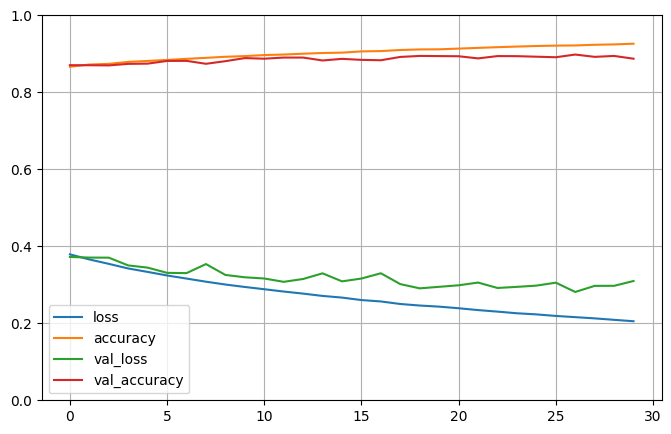

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
history_df = pd.DataFrame(history.history)
history_df.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## 评估model

In [19]:
loss, accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 58.8143 - accuracy: 0.8616


In [20]:
print("Test accuracy: {:.3f}".format(accuracy))
print("Test loss: {:.3f}".format(loss))

Test accuracy: 0.862
Test loss: 58.814


## 使用model进行预测

In [26]:
import numpy as np

# 设置随机种子
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)
y_pred = np.argmax(y_proba, axis=1)
print("Predicted classes:", [class_names[i] for i in y_pred])

1/1 [==============================] - 0s 12ms/step
Predicted classes: ['Ankle boot', 'Pullover', 'Trouser']
